# 第4章 变形

In [35]:
import numpy as np
import pandas as pd

In [77]:
df = pd.read_csv('/Users/guzhengan/Desktop/joyful-pandas/data/table.csv')
df.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


## 一、透视表
### 1.pivot
#### 一般情况下，数据在DataFrame会以压缩（stacked）状态存放，如上面的Gender，两个类别被叠在一列中，pivot函数可以将某一列作为新的cols：

In [4]:
df.pivot(index = 'ID',columns = 'Gender',values = 'Height').head()

Gender,F,M
ID,,
1101,NaN,173.0
1102,192.0,NaN
1103,NaN,186.0
1104,167.0,NaN
1105,159.0,NaN


#### 然而pivot函数具有很强的局限性，不允许values中出现重复的行列索引对（pair），例如下面语句会报错：
#### 因此，更多的时候选择使用功能强大的pivot_table函数

In [5]:
df.pivot(index = 'School',colums = 'Gender',values = 'Height').head()

TypeError: pivot() got an unexpected keyword argument 'colums'

### 2. pivot_table
#### 首先，重复上面的操作

In [8]:
df.pivot_table(index = 'ID',columns = 'Gender',values = 'Height').head()

Gender,F,M
ID,,
1101,NaN,173.0
1102,192.0,NaN
1103,NaN,186.0
1104,167.0,NaN
1105,159.0,NaN


In [9]:
pd.pivot_table(df,index='ID',columns='Gender',values='Height').head()

Gender,F,M
ID,,
1101,NaN,173.0
1102,192.0,NaN
1103,NaN,186.0
1104,167.0,NaN
1105,159.0,NaN


### Pandas中提供了各种选项，介绍常用参数：
#### 1⃣️ aggfunc：对组内进行聚合统计，可传入各类函数，默认为‘mean’

In [10]:
pd.pivot_table(df,index = 'School',columns = 'Gender',values = 'Height',aggfunc=['mean','sum']).head()

mean               sum      
Gender           F           M     F     M
School                                    
S_1     173.125000  178.714286  1385  1251
S_2     173.727273  172.000000  1911  1548

#### 2⃣️margins:    汇总边际状态

In [11]:
pd.pivot_table(df,index = 'School',columns='Gender',values='Height',aggfunc=['mean','sum'],margins=True).head()
# margins_name 可以设置名字，默认是'All'

mean                           sum            
Gender           F           M         All     F     M   All
School                                                      
S_1     173.125000  178.714286  175.733333  1385  1251  2636
S_2     173.727273  172.000000  172.950000  1911  1548  3459
All     173.473684  174.937500  174.142857  3296  2799  6095

#### 3⃣️.行、列、值都可以为多级

In [13]:
pd.pivot_table(df,index = ['School','Class'],
              columns=['Gender','Address'],
              values = ['Height','Weight'])

Height                                                        \
Gender              F                                                     M   
Address      street_1 street_2 street_4 street_5 street_6 street_7 street_1   
School Class                                                                  
S_1    C_1        NaN    179.5    159.0      NaN      NaN      NaN    173.0   
       C_2        NaN      NaN    176.0    162.0    167.0      NaN      NaN   
       C_3      175.0      NaN      NaN    187.0      NaN      NaN      NaN   
S_2    C_1        NaN      NaN      NaN    159.0    161.0      NaN      NaN   
       C_2        NaN      NaN      NaN      NaN      NaN    188.5    175.0   

                                         ...   Weight                    \
Gender                                   ...        F                     
Address      street_2 street_4 street_5  ... street_4 street_5 street_6   
School Class                             ...                              
S_1    C_1      186.0      NaN      NaN  ...     64.0      NaN      NaN   
       C_2        NaN      NaN    188.0  ...     94.0     63.0     63.0   
       C_3      195.0    161.0      NaN  ...      NaN     69.0      NaN   
S_2    C_1        NaN    163.5      NaN  ...      NaN     97.0     61.0   
       C_2        NaN    155.0    193.0  ...      NaN      NaN      NaN   

                                                                             
Gender                       M                                               
Address      street_7 street_1 street_2 street_4 street_5 street_6 street_7  
School Class                                                                 
S_1    C_1        NaN     63.0     82.0      NaN      NaN      NaN      NaN  
       C_2        NaN      NaN      NaN      NaN     68.0     53.0      NaN  
       C_3        NaN      NaN     70.0     68.0      NaN      NaN     82.0  
S_2    C_1        NaN      NaN      NaN     71.0      NaN      NaN     84.0  
       C_2       76.5     74.0      NaN     91.0    100.0      NaN      NaN  

[5 rows x 24 columns]

### 3.crosstab（交叉表）
#### 交叉表是一种特殊的透视表，典型的用途如分组统计，如现在想要统计关于街道和性别分组的频数：

In [15]:
pd.crosstab(index = df['Address'],columns=df['Gender'])

Gender,F,M
Address,,
street_1,1,2
street_2,4,2
street_4,3,5
street_5,3,3
street_6,5,1
street_7,3,3


#### 1⃣️values和aggfunc：分组对某些数据进行聚合操作，这两个参数必须成对出现：

In [18]:
pd.crosstab(index = df['Address'],columns = df['Gender'],
           values=np.random.randint(1,20,df.shape[0]),aggfunc=['min'])

min    
Gender     F   M
Address         
street_1  16  13
street_2   5   2
street_4   6   1
street_5   3   7
street_6   2  19
street_7   2   8

#### 2⃣️ 除了边际参数margins外，还引入了normalize参数，可选‘index’，‘all’，‘columns’参数值

In [22]:
pd.crosstab(index = df['Address'],columns = df['Gender'],normalize='index',margins=True)

Gender,F,M
Address,,
street_1,0.333333,0.666667
street_2,0.666667,0.333333
street_4,0.375000,0.625000
street_5,0.500000,0.500000
street_6,0.833333,0.166667
street_7,0.500000,0.500000
All,0.542857,0.457143


In [21]:
pd.crosstab(index = df['Address'],columns = df['Gender'],normalize='all',margins=True)

Gender,F,M,All
Address,,,
street_1,0.028571,0.057143,0.085714
street_2,0.114286,0.057143,0.171429
street_4,0.085714,0.142857,0.228571
street_5,0.085714,0.085714,0.171429
street_6,0.142857,0.028571,0.171429
street_7,0.085714,0.085714,0.171429
All,0.542857,0.457143,1.000000


## 二、其他变形方法 
### 1.melt
#### melt 函数可以认为是pivot函数的逆操作，将unstacked状态的数据，压缩成stacked，使“宽”的DataFrame变成“窄”

In [23]:
df_m = df[['ID','Gender','Math']]
df_m.head()

,ID,Gender,Math
0,1101,M,34.0
1,1102,F,32.5
2,1103,M,87.2
3,1104,F,80.4
4,1105,F,84.8


In [24]:
df_m.pivot(index = 'ID',columns='Gender',values = 'Math').head()

Gender,F,M
ID,,
1101,NaN,34.0
1102,32.5,NaN
1103,NaN,87.2
1104,80.4,NaN
1105,84.8,NaN


### 2.压缩与展开
#### （1） stack：这是最基础的变形函数，总共只有两个参数：level和dropna

In [78]:
df_s = pd.pivot_table(df,index = ['Class','ID'],columns='Gender',values=['Height','Weight'])
df_s.groupby('Class').head(2)

Height        Weight      
Gender          F      M      F     M
Class ID                             
C_1   1101    NaN  173.0    NaN  63.0
      1102  192.0    NaN   73.0   NaN
C_2   1201    NaN  188.0    NaN  68.0
      1202  176.0    NaN   94.0   NaN
C_3   1301    NaN  161.0    NaN  68.0
      1302  175.0    NaN   57.0   NaN
C_4   2401  192.0    NaN   62.0   NaN
      2402    NaN  166.0    NaN  82.0

In [29]:
df_stacked = df_s.stack()
df_stacked.groupby('Class').head(2)

Height  Weight
Class ID   Gender                
C_1   1101 M        173.0    63.0
      1102 F        192.0    73.0
C_2   1201 M        188.0    68.0
      1202 F        176.0    94.0
C_3   1301 M        161.0    68.0
      1302 F        175.0    57.0
C_4   2401 F        192.0    62.0
      2402 M        166.0    82.0

#### stack函数可以看作将横向索引放到纵向，因此功能类似与melt，参数level可指定变化的列索引是哪一层（或那几层，需要列表）

In [80]:
pd.pivot_table(df,index = ['Class','ID'],columns='Gender',values=['Height','Weight']).head()

Height        Weight      
Gender          F      M      F     M
Class ID                             
C_1   1101    NaN  173.0    NaN  63.0
      1102  192.0    NaN   73.0   NaN
      1103    NaN  186.0    NaN  82.0
      1104  167.0    NaN   81.0   NaN
      1105  159.0    NaN   64.0   NaN

In [83]:
df_stacked = df_s.stack(0)
df_stacked.groupby('Class').head(2)

Gender                 F      M
Class ID                       
C_1   1101 Height    NaN  173.0
           Weight    NaN   63.0
C_2   1201 Height    NaN  188.0
           Weight    NaN   68.0
C_3   1301 Height    NaN  161.0
           Weight    NaN   68.0
C_4   2401 Height  192.0    NaN
           Weight   62.0    NaN

#### (2) unstack：stack的逆函数，功能上类似于pivot_table¶

In [31]:
df_stacked.head()

Gender                 F      M
Class ID                       
C_1   1101 Height    NaN  173.0
           Weight    NaN   63.0
      1102 Height  192.0    NaN
           Weight   73.0    NaN
      1103 Height    NaN  186.0

In [33]:
result = df_stacked.unstack().swaplevel(1,0,axis = 1).sort_index(axis = 1)
result.equals(df_s)

True

## 三、哑变量与因子化
### 1. Dummy Variable(哑变量)
#### 这里主要介绍get_dummies函数，起主要功能是进行one-hot编码：

In [38]:
df_d = df[['Class','Gender','Weight']]
df_d.head()

,Class,Gender,Weight
0,C_1,M,63
1,C_1,F,73
2,C_1,M,82
3,C_1,F,81
4,C_1,F,64


#### 现在希望将上面的表格前两列转化为哑变量，并加入第三列Weight数值：

In [39]:
pd.get_dummies(df_d[['Class','Gender']]).join(df_d['Weight']).head()
#可选prefix参数添加前缀，prefix_sep添加分隔符

,Class_C_1,Class_C_2,Class_C_3,Class_C_4,Gender_F,Gender_M,Weight
0,1,0,0,0,0,1,63
1,1,0,0,0,1,0,73
2,1,0,0,0,0,1,82
3,1,0,0,0,1,0,81
4,1,0,0,0,1,0,64


### 2.factorize方法 

#### 该方法主要用于自然数编码，并且缺失值会被记做-1，其中sort参数表示是否排序后赋值

In [40]:
codes, uniques = pd.factorize(['b', None, 'a', 'c', 'b'], sort=True)
display(codes)
display(uniques)

array([ 1, -1,  0,  2,  1])

array(['a', 'b', 'c'], dtype=object)

## 四、问题与练习
### 1.问题

#### 【问题一】 上面提到了许多变形函数，如melt/crosstab/pivot/pivot_table/stack/unstack函数，请总结它们各自的使用特点。

melt函数 将未压缩（unstacked）的数据进行压缩；crosstab：一种特殊的透视表，可以对表中数进行一些操作，如：聚合等；
pivot 透视表：将压缩好的数据中取出某列同类别的数作为新的column；
pivot_table：pivot的升级版，可传入参数aggfunc，参数aggfunc中可传入多种函数，但速度差与pivot；
stack：压缩函数，将横向的索引放到纵向；
unstack：stack的逆操作，功能类似于pivot_table

#### 【问题二】 变形函数和多级索引是什么关系？哪些变形函数会使得索引维数变化？具体如何变化？

### 2.练习
#### 【练习一】 继续使用上一章的药物数据集：

In [42]:
pd.read_csv('/Users/guzhengan/Desktop/joyful-pandas/data/Drugs.csv').head()

,YYYY,State,COUNTY,SubstanceName,DrugReports
0,2010,VA,ACCOMACK,Propoxyphene,1
1,2010,OH,ADAMS,Morphine,9
2,2010,PA,ADAMS,Methadone,2
3,2010,VA,ALEXANDRIA CITY,Heroin,5
4,2010,PA,ALLEGHENY,Hydromorphone,5


#### (a) 现在请你将数据表转化成如下形态，每行需要显示每种药物在每个地区的10年至17年的变化情况，且前三列需要排序：
#### 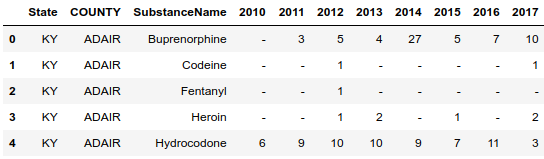

In [55]:
df_ex = pd.read_csv('/Users/guzhengan/Desktop/joyful-pandas/data/Drugs.csv',index_col=['State','COUNTY']).sort_index()
df_ex.head()

YYYY  SubstanceName  DrugReports
State COUNTY                                  
KY    ADAIR   2010      Methadone            1
      ADAIR   2010    Hydrocodone            6
      ADAIR   2011      Oxycodone            4
      ADAIR   2011  Buprenorphine            3
      ADAIR   2011       Morphine            2

In [58]:
result = pd.pivot_table(df_ex,index = ['State','COUNTY','SubstanceName'],columns = 'YYYY',values='DrugReports',
fill_value = '-').reset_index().rename_axis(columns = {'YYYY':''})
result.head()

,State,COUNTY,SubstanceName,2010,2011,2012,2013,2014,2015,2016,2017
0,KY,ADAIR,Buprenorphine,-,3,5,4,27,5,7,10
1,KY,ADAIR,Codeine,-,-,1,-,-,-,-,1
2,KY,ADAIR,Fentanyl,-,-,1,-,-,-,-,-
3,KY,ADAIR,Heroin,-,-,1,2,-,1,-,2
4,KY,ADAIR,Hydrocodone,6,9,10,10,9,7,11,3


#### (b) 现在请将(a)中的结果恢复到原数据表，并通过equal函数检验初始表与新的结果是否一致（返回True）

In [59]:
result_melted = result.melt(id_vars=result.columns[:3],value_vars=result.columns[-8:]
                ,var_name='YYYY',value_name='DrugReports').query('DrugReports != "-"')
result2 = result_melted.sort_values(by=['State','COUNTY','YYYY'
                                    ,'SubstanceName']).reset_index().drop(columns='index')
#下面其实无关紧要，只是交换两个列再改一下类型（因为‘-’所以type变成object了）
cols = list(result2.columns)
a, b = cols.index('SubstanceName'), cols.index('YYYY')
cols[b], cols[a] = cols[a], cols[b]
result2 = result2[cols].astype({'DrugReports':'int','YYYY':'int'})
result2.head()

,State,COUNTY,YYYY,SubstanceName,DrugReports
0,KY,ADAIR,2010,Hydrocodone,6
1,KY,ADAIR,2010,Methadone,1
2,KY,ADAIR,2011,Buprenorphine,3
3,KY,ADAIR,2011,Hydrocodone,9
4,KY,ADAIR,2011,Morphine,2


### 【练习二】 现有一份关于某地区地震情况的数据集，请解决如下问题:

#### (a) 现在请你将数据表转化成如下形态，将方向列展开，并将距离、深度和烈度三个属性压缩：
#### (b) 现在请将(a)中的结果恢复到原数据表，并通过equal函数检验初始表与新的结果是否一致（返回True）

In [64]:
df = pd.read_csv('/Users/guzhengan/Desktop/joyful-pandas/data/Earthquake.csv')
df.head()

,日期,时间,维度,经度,方向,距离,深度,烈度
0,2003.05.20,12:17:44 AM,39.04,40.38,west,0.1,10.0,0.0
1,2007.08.01,12:03:08 AM,40.79,30.09,west,0.1,5.2,4.0
2,1978.05.07,12:41:37 AM,38.58,27.61,south_west,0.1,0.0,0.0
3,1997.03.22,12:31:45 AM,39.47,36.44,south_west,0.1,10.0,0.0
4,2000.04.02,12:57:38 AM,40.80,30.24,south_west,0.1,7.0,0.0


In [65]:
df_2 = df.sort_values(by=df.columns.tolist()[:3]).sort_index(axis=1).reset_index().drop(columns='index')
df_2.head()

,方向,日期,时间,深度,烈度,经度,维度,距离
0,south_east,1912.08.09,12:29:00 AM,16.0,6.7,27.2,40.6,4.3
1,south_west,1912.08.10,12:23:00 AM,15.0,6.0,27.1,40.6,2.0
2,south_west,1912.08.10,12:30:00 AM,15.0,5.2,27.1,40.6,2.0
3,south_east,1912.08.11,12:19:04 AM,30.0,4.9,27.2,40.6,4.3
4,south_west,1912.08.11,12:20:00 AM,15.0,4.5,27.1,40.6,2.0


In [73]:
result = pd.pivot_table(df_2,index=['日期','时间','维度','经度']
            ,columns='方向'
            ,values=['烈度','深度','距离'],fill_value='-')
result

深度                                    \
方向                                 east north north_east north_west south   
日期         时间          维度    经度                                             
1912.08.09 12:29:00 AM 40.60 27.20    -     -          -          -     -   
1912.08.10 12:23:00 AM 40.60 27.10    -     -          -          -     -   
           12:30:00 AM 40.60 27.10    -     -          -          -     -   
1912.08.11 12:19:04 AM 40.60 27.20    -     -          -          -     -   
           12:20:00 AM 40.60 27.10    -     -          -          -     -   
...                                 ...   ...        ...        ...   ...   
2017.07.26 12:50:05 AM 40.76 32.87    -     -          -          -     -   
2017.07.29 12:24:11 AM 37.12 28.59    -     5          -          -     -   
           12:33:23 AM 37.11 27.73    -     -        6.5          -     -   
2017.07.30 12:21:33 AM 37.39 31.37    -     -          -          -     -   
2017.07.31 12:11:31 AM 37.42 31.37    -     -          -        5.1     -   

                                                                烈度        ...  \
方向                                 south_east south_west west east north  ...   
日期         时间          维度    经度                                           ...   
1912.08.09 12:29:00 AM 40.60 27.20         16          -    -    -     -  ...   
1912.08.10 12:23:00 AM 40.60 27.10          -         15    -    -     -  ...   
           12:30:00 AM 40.60 27.10          -         15    -    -     -  ...   
1912.08.11 12:19:04 AM 40.60 27.20         30          -    -    -     -  ...   
           12:20:00 AM 40.60 27.10          -         15    -    -     -  ...   
...                                       ...        ...  ...  ...   ...  ...   
2017.07.26 12:50:05 AM 40.76 32.87          5          -    -    -     -  ...   
2017.07.29 12:24:11 AM 37.12 28.59          -          -    -    -   3.9  ...   
           12:33:23 AM 37.11 27.73          -          -    -    -     -  ...   
2017.07.30 12:21:33 AM 37.39 31.37          -          5    -    -     -  ...   
2017.07.31 12:11:31 AM 37.42 31.37          -          -    -    -     -  ...   

                                                     距离                   \
方向                                 south_west west east north north_east   
日期         时间          维度    经度                                            
1912.08.09 12:29:00 AM 40.60 27.20          -    -    -     -          -   
1912.08.10 12:23:00 AM 40.60 27.10          6    -    -     -          -   
           12:30:00 AM 40.60 27.10        5.2    -    -     -          -   
1912.08.11 12:19:04 AM 40.60 27.20          -    -    -     -          -   
           12:20:00 AM 40.60 27.10        4.5    -    -     -          -   
...                                       ...  ...  ...   ...        ...   
2017.07.26 12:50:05 AM 40.76 32.87          -    -    -     -          -   
2017.07.29 12:24:11 AM 37.12 28.59          -    -    -   0.5          -   
           12:33:23 AM 37.11 27.73          -    -    -     -        1.2   
2017.07.30 12:21:33 AM 37.39 31.37        3.5    -    -     -          -   
2017.07.31 12:11:31 AM 37.42 31.37          -    -    -     -          -   

                                                                                
方向                                 north_west south south_east south_west west  
日期         时间          维度    经度                                                 
1912.08.09 12:29:00 AM 40.60 27.20          -     -        4.3          -    -  
1912.08.10 12:23:00 AM 40.60 27.10          -     -          -          2    -  
           12:30:00 AM 40.60 27.10          -     -          -          2    -  
1912.08.11 12:19:04 AM 40.60 27.20          -     -        4.3          -    -  
           12:20:00 AM 40.60 27.10          -     -          -          2    -  
...                                       ...   ...        ...        ...  ...  
2017.07.26 12:50:05 AM 40.76 

In [71]:
result.stack(level=0).rename_axis(index={None:'地震参数'})
result.head(6)

方向                                    east north north_east north_west south  \
日期         时间          维度   经度   地震参数                                          
1912.08.09 12:29:00 AM 40.6 27.2 深度      -     -          -          -     -   
                                 烈度      -     -          -          -     -   
                                 距离      -     -          -          -     -   
1912.08.10 12:23:00 AM 40.6 27.1 深度      -     -          -          -     -   
                                 烈度      -     -          -          -     -   
                                 距离      -     -          -          -     -   

方向                                    south_east south_west west  
日期         时间          维度   经度   地震参数                             
1912.08.09 12:29:00 AM 40.6 27.2 深度           16          -    -  
                                 烈度          6.7          -    -  
                                 距离          4.3          -    -  
1912.08.10 12:23:00 AM 40.6 27.1 深度            -         15    -  
                                 烈度            -          6    -  
                                 距离            -          2    -